<a href="https://colab.research.google.com/github/yaren-ylnbs/Borsa-Tahmin-Uygulamas-/blob/main/Borsaadim1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

[*********************100%***********************]  1 of 1 completed


ARIMA Mean Squared Error: 584.44
SARIMA Mean Squared Error: 6533.68
Tahmin Karşılaştırması:
            Gerçek Değerler  ARIMA Tahminleri  SARIMA Tahminleri
Date                                                            
2023-12-15       197.570007        198.084703         199.578986
2023-12-18       195.889999        197.935676         199.077185
2023-12-19       196.940002        197.977951         201.036106
2023-12-20       194.830002        198.104599         200.404615
2023-12-21       194.679993        198.106271         203.260617
Tahminler AAPL_Tahmin_Karsilastirma.xlsx olarak kaydedildi.


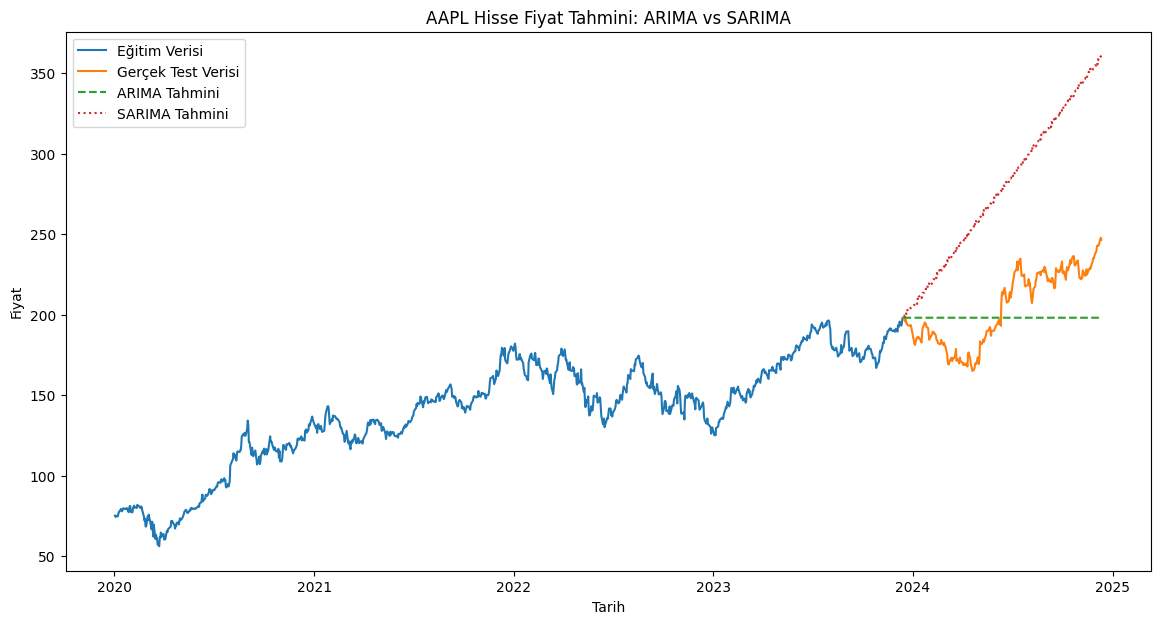

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# Şirket verilerini çekmek Apple
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2024-12-31')

# Kapanış fiyatlarını seçme
data_close = data['Close']

# Eğitim ve test veri setlerini ayırma
train_size = int(len(data_close) * 0.8)
train, test = data_close[:train_size], data_close[train_size:]

# ARIMA modeli eğitimi
arima_model = ARIMA(train, order=(5, 1, 0))
arima_result = arima_model.fit()

# SARIMA modeli eğitimi
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
sarima_result = sarima_model.fit()

# Tahminler
arima_forecast = arima_result.forecast(steps=len(test)).values
sarima_forecast = sarima_result.forecast(steps=len(test)).values

# Hata hesaplama
arima_mse = mean_squared_error(test, arima_forecast)
sarima_mse = mean_squared_error(test, sarima_forecast)
print(f"ARIMA Mean Squared Error: {arima_mse:.2f}")
print(f"SARIMA Mean Squared Error: {sarima_mse:.2f}")

# Tahminleri ve gerçek değerleri bir DataFrame'e koyma
# test.values yerine test.squeeze() kullanarak 1 boyutlu dizi elde ediyoruz.
results = pd.DataFrame({
    'Gerçek Değerler': test.squeeze(),  # Değişiklik burada
    'ARIMA Tahminleri': arima_forecast,
    'SARIMA Tahminleri': sarima_forecast
}, index=test.index)

# Tahmin ve Gerçek Değerleri Tablo Olarak Görüntüleme
print("Tahmin Karşılaştırması:")
print(results.head())

# Sonuçları bir Excel dosyasına kaydetmek için
results.to_excel(f"{ticker}_Tahmin_Karsilastirma.xlsx")
print(f"Tahminler {ticker}_Tahmin_Karsilastirma.xlsx olarak kaydedildi.")

# Grafiksel karşılaştırma
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Eğitim Verisi')
plt.plot(test.index, test, label='Gerçek Test Verisi')
plt.plot(test.index, arima_forecast, label='ARIMA Tahmini', linestyle='dashed')
plt.plot(test.index, sarima_forecast, label='SARIMA Tahmini', linestyle='dotted')
plt.legend()
plt.title(f'{ticker} Hisse Fiyat Tahmini: ARIMA vs SARIMA')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.show()

[*********************100%***********************]  1 of 1 completed


ARIMA Mean Squared Error (MSE): 584.44
SARIMA Mean Squared Error (MSE): 6533.68
ARIMA Root Mean Squared Error (RMSE): 24.18
SARIMA Root Mean Squared Error (RMSE): 80.83
ARIMA Mean Absolute Error (MAE): 21.76
SARIMA Mean Absolute Error (MAE): 75.14
Tahmin Karşılaştırması:
            Gerçek Değerler  ARIMA Tahminleri  SARIMA Tahminleri
Date                                                            
2023-12-15       197.570007        198.084703         199.578986
2023-12-18       195.889999        197.935676         199.077185
2023-12-19       196.940002        197.977951         201.036106
2023-12-20       194.830002        198.104599         200.404615
2023-12-21       194.679993        198.106271         203.260617
Tahminler AAPL_Tahmin_Karsilastirma.xlsx olarak kaydedildi.


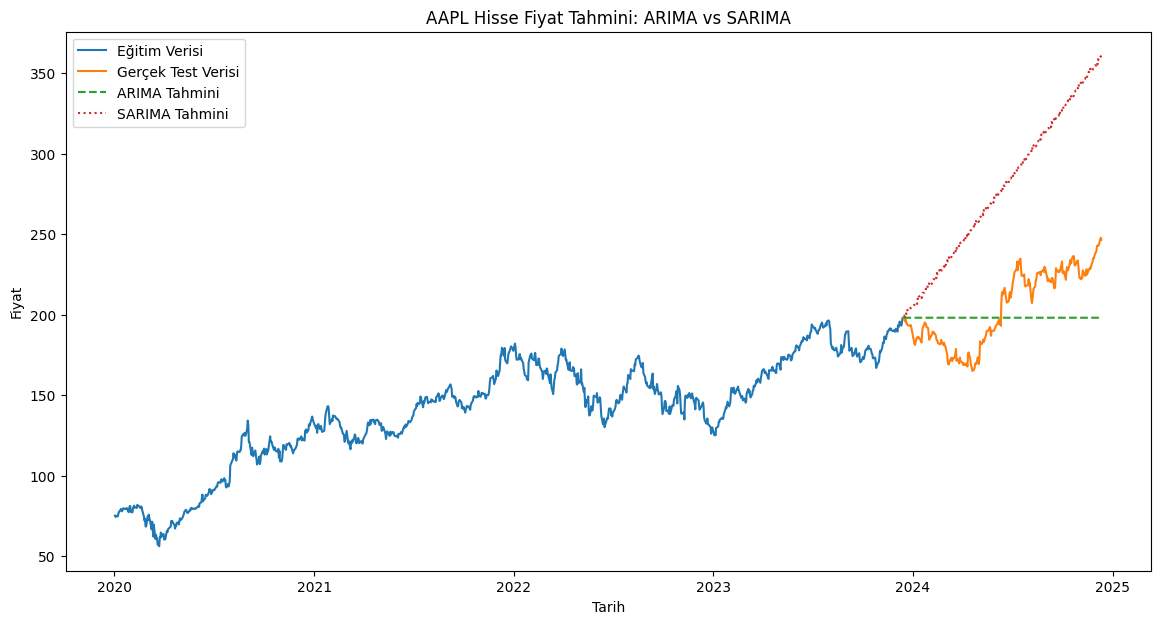

Mevsimsellik analizi yapılıyor...


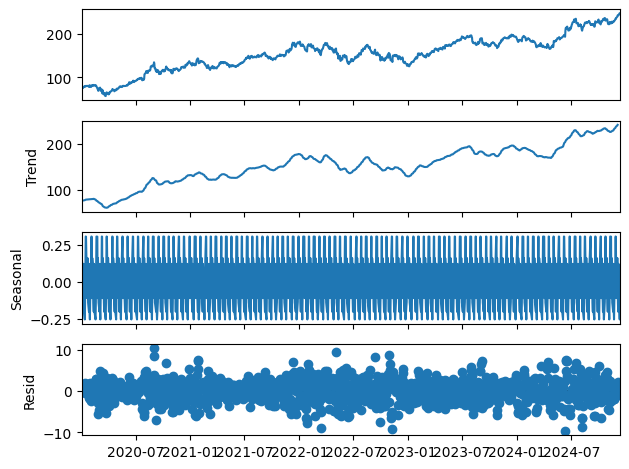

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Şirket verilerini çekmek (örnek: Apple)
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2024-12-31')

# Kapanış fiyatlarını seçme
data_close = data['Close']

# Eğitim ve test veri setlerini ayırma
train_size = int(len(data_close) * 0.8)
train, test = data_close[:train_size], data_close[train_size:]

# ARIMA modeli eğitimi
arima_model = ARIMA(train, order=(5, 1, 0))
arima_result = arima_model.fit()

# SARIMA modeli eğitimi
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
sarima_result = sarima_model.fit()

# Tahminler
arima_forecast = arima_result.forecast(steps=len(test)).values
sarima_forecast = sarima_result.forecast(steps=len(test)).values

# Hata hesaplama
arima_mse = mean_squared_error(test, arima_forecast)
sarima_mse = mean_squared_error(test, sarima_forecast)
arima_rmse = np.sqrt(arima_mse)
sarima_rmse = np.sqrt(sarima_mse)
arima_mae = mean_absolute_error(test, arima_forecast)
sarima_mae = mean_absolute_error(test, sarima_forecast)

# Sonuçları yazdırma
print(f"ARIMA Mean Squared Error (MSE): {arima_mse:.2f}")
print(f"SARIMA Mean Squared Error (MSE): {sarima_mse:.2f}")
print(f"ARIMA Root Mean Squared Error (RMSE): {arima_rmse:.2f}")
print(f"SARIMA Root Mean Squared Error (RMSE): {sarima_rmse:.2f}")
print(f"ARIMA Mean Absolute Error (MAE): {arima_mae:.2f}")
print(f"SARIMA Mean Absolute Error (MAE): {sarima_mae:.2f}")

# Tahminleri ve gerçek değerleri bir DataFrame'e koyma
results = pd.DataFrame({
    'Gerçek Değerler': test.values.ravel(),  # .ravel() ile 1 boyutlu hale getiriyoruz
    'ARIMA Tahminleri': arima_forecast,
    'SARIMA Tahminleri': sarima_forecast
}, index=test.index)

# Tahmin ve Gerçek Değerleri Tablo Olarak Görüntüleme
print("Tahmin Karşılaştırması:")
print(results.head())

# Sonuçları bir Excel dosyasına kaydetmek için
results.to_excel(f"{ticker}_Tahmin_Karsilastirma.xlsx")
print(f"Tahminler {ticker}_Tahmin_Karsilastirma.xlsx olarak kaydedildi.")

# Grafiksel karşılaştırma
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Eğitim Verisi')
plt.plot(test.index, test, label='Gerçek Test Verisi')
plt.plot(test.index, arima_forecast, label='ARIMA Tahmini', linestyle='dashed')
plt.plot(test.index, sarima_forecast, label='SARIMA Tahmini', linestyle='dotted')
plt.legend()
plt.title(f'{ticker} Hisse Fiyat Tahmini: ARIMA vs SARIMA')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.show()

# Mevsimsellik analizi
print("Mevsimsellik analizi yapılıyor...")
result = seasonal_decompose(data_close, model='additive', period=12)
result.plot()
plt.show()


In [ ]:
pip install pandas-ta


In [ ]:
!pip install pandas_ta # Install the pandas_ta library
import pandas_ta as ta  # Now import pandas_ta

In [ ]:
# ARIMA ve SARIMA modellerini optimize etme
def optimize_arima(train, p_range, d_range, q_range):
    best_score, best_params = float("inf"), (0, 0, 0)
    for p, d, q in [(p, d, q) for p in p_range for d in d_range for q in q_range]:
        try:
            model = ARIMA(train, order=(p, d, q))
            result = model.fit()
            mse = mean_squared_error(train[-10:], result.forecast(steps=10))
            if mse < best_score:
                best_score, best_params = mse, (p, d, q)
        except:
            continue
    return best_params
    #pdq parametreleri p:mevsimlik gözlem sayısı d:duraganlık q:hareketli günlük ortalama s:süre sayısı

In [ ]:
# ARIMA ve SARIMA modellerini optimize etme
def optimize_arima(train, p_range, d_range, q_range):
    best_score, best_params = float("inf"), (0, 1, 0)  # Initialize best_params with a default value
    for p, d, q in [(p, d, q) for p in p_range for d in d_range for q in q_range]:
        try:
            model = ARIMA(train, order=(p, d, q))
            result = model.fit()
            mse = mean_squared_error(train[-10:], result.forecast(steps=10))
            if mse < best_score:
                best_score, best_params = mse, (p, d, q)
        except:
            continue
    return best_params # Return the initialized default value if no better parameters are found

In [ ]:
def main(symbol="AAPL", start_date="2020-01-01", end_date="2024-12-31"):
    df = get_stock_data(symbol, start_date, end_date)

    # Eğitim ve test ayrımı
    train_size = int(len(df['Close']) * 0.8)
    train, test = df['Close'][:train_size], df['Close'][train_size:]

    # Test verisini Series'ten NumPy array'e dönüştürme
    test = np.array(test)

    # ARIMA optimizasyonu
    arima_params = optimize_arima(train, range(0, 6), range(0, 2), range(0, 6))
    arima_model = ARIMA(train, order=arima_params).fit()
    arima_forecast = arima_model.forecast(steps=len(test)).values

    # Tahminleri NumPy array'e dönüştürme
    arima_forecast = np.array(arima_forecast)

    # SARIMA modeli
    sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12)).fit()
    sarima_forecast = sarima_model.forecast(steps=len(test)).values

    # Tahminleri NumPy array'e dönüştürme
    sarima_forecast = np.array(sarima_forecast)

    # Hata hesaplama
    arima_metrics = {
        "mse": mean_squared_error(test, arima_forecast),
        "rmse": np.sqrt(mean_squared_error(test, arima_forecast)),
        "mae": mean_absolute_error(test, arima_forecast),
        "mape": mean_absolute_percentage_error(test, arima_forecast)
    }
    sarima_metrics = {
        "mse": mean_squared_error(test, sarima_forecast),
        "rmse": np.sqrt(mean_squared_error(test, sarima_forecast)),
        "mae": mean_absolute_error(test, sarima_forecast),
        "mape": mean_absolute_percentage_error(test, sarima_forecast)
    }

    print(f"ARIMA Metrics: {arima_metrics}")
    print(f"SARIMA Metrics: {sarima_metrics}")

    # Grafik
    plot_results(train, test, arima_forecast, sarima_forecast, symbol)

    # Performans raporu
    generate_report(symbol, arima_metrics, sarima_metrics)



In [ ]:
print("1. Veri indirildi.")
print("2. Eğitim ve test verileri ayrıldı.")
print("3. ARIMA optimizasyonu başlatılıyor...")
# ARIMA işlemleri
print("4. ARIMA modeli eğitildi.")
print("5. SARIMA modeli eğitiliyor...")
# SARIMA işlemleri
print("6. Tahminler yapıldı.")
print("7. Metrikler hesaplanıyor...")
# Hata metrikleri hesaplanır
print("8. Grafik ve rapor oluşturuluyor...")


1. Veri indirildi.
2. Eğitim ve test verileri ayrıldı.
3. ARIMA optimizasyonu başlatılıyor...
4. ARIMA modeli eğitildi.
5. SARIMA modeli eğitiliyor...
6. Tahminler yapıldı.
7. Metrikler hesaplanıyor...
8. Grafik ve rapor oluşturuluyor...


In [ ]:
if __name__ == "__main__":
    main()


[*********************100%***********************]  1 of 1 completed

Price            Open       High        Low      Close     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  74.059998  75.150002  73.797501  75.087502  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  132079200


In [ ]:
symbol = "AAPL"
start_date = "2020-01-01"
end_date = "2024-12-11"

df = get_stock_data(symbol, start_date, end_date)
if df.empty:
    print("Veri alınamadı. Lütfen sembolü veya tarih aralığını kontrol edin.")
else:
    print(df.head())


[*********************100%***********************]  1 of 1 completed

Price            Open       High        Low      Close     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  74.059998  75.150002  73.797501  75.087502  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  132079200


In [ ]:
def main(symbol="AAPL", start_date="2020-01-01", end_date="2024-12-11"):
    df = get_stock_data(symbol, start_date, end_date)
    if df.empty:
        print("Veri alınamadı. Lütfen sembolü veya tarih aralığını kontrol edin.")
        return
    print(df.head())

# Ana fonksiyonu çağırma
if __name__ == "__main__":
    main()


[*********************100%***********************]  1 of 1 completed

Price            Open       High        Low      Close     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  74.059998  75.150002  73.797501  75.087502  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  132079200


In [ ]:
def main(symbol="AAPL", start_date="2020-01-01", end_date="2024-12-11"):
    df = get_stock_data(symbol, start_date, end_date)
    if df.empty:
        print("Veri alınamadı. Lütfen sembolü veya tarih aralığını kontrol edin.")
        return

    train_size = int(len(df['Close']) * 0.8)
    train, test = df['Close'][:train_size], df['Close'][train_size:]

    arima_params = optimize_arima(train, range(0, 6), range(0, 2), range(0, 6))
    if arima_params is None:
        print("ARIMA parametre optimizasyonu başarısız.")
        return
    print(f"Optimum ARIMA parametreleri: {arima_params}")


In [ ]:
arima_params = optimize_arima(train, range(0, 6), range(0, 2), range(0, 6))
if arima_params is None:
    print("ARIMA parametre optimizasyonu başarısız. Kod burada durdurulmalı.")
    exit()  # Programı durdurur
print(f"Optimum ARIMA parametreleri: {arima_params}")


Parametre (0, 0, 0) için hata: SARIMAX models require univariate `endog`. Got shape (1992, 2).
Parametre (0, 0, 1) için hata: SARIMAX models require univariate `endog`. Got shape (1992, 2).
Parametre (0, 0, 2) için hata: SARIMAX models require univariate `endog`. Got shape (1992, 2).
Parametre (0, 0, 3) için hata: SARIMAX models require univariate `endog`. Got shape (1992, 2).
Parametre (0, 0, 4) için hata: SARIMAX models require univariate `endog`. Got shape (1992, 2).
Parametre (0, 0, 5) için hata: SARIMAX models require univariate `endog`. Got shape (1992, 2).
Parametre (0, 1, 0) için hata: SARIMAX models require univariate `endog`. Got shape (1992, 2).
Parametre (0, 1, 1) için hata: SARIMAX models require univariate `endog`. Got shape (1992, 2).
Parametre (0, 1, 2) için hata: SARIMAX models require univariate `endog`. Got shape (1992, 2).
Parametre (0, 1, 3) için hata: SARIMAX models require univariate `endog`. Got shape (1992, 2).
Parametre (0, 1, 4) için hata: SARIMAX models requ

In [ ]:
def main():
    # Diğer kodlar burada
    if len(arima_forecast) == 0 or len(sarima_forecast) == 0:
        print("Tahmin sonuçları boş. Model tahmin yapmamış.")
        return  # Bu artık bir fonksiyon içinde


In [ ]:
if len(arima_forecast) == 0 or len(sarima_forecast) == 0:
    print("Tahmin sonuçları boş. Model tahmin yapmamış.")
    exit()  # Programı durdurur


In [ ]:
symbol = "AAPL"


In [ ]:
import plotly.graph_objects as go

def plot_results(train, test, arima_forecast, sarima_forecast, ticker):
    """
    Eğitim, test ve tahmin sonuçlarını görselleştiren bir fonksiyon.
    """
    fig = go.Figure()

    # Eğitim verisi
    fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name='Eğitim Verisi'))

    # Test verisi
    fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name='Test Verisi'))

    # ARIMA tahminleri
    fig.add_trace(go.Scatter(x=test.index, y=arima_forecast, mode='lines', name='ARIMA Tahminleri'))

    # SARIMA tahminleri
    fig.add_trace(go.Scatter(x=test.index, y=sarima_forecast, mode='lines', name='SARIMA Tahminleri'))

    # Grafik düzeni
    fig.update_layout(
        title=f"{ticker} Hisse Fiyat Tahmini",
        xaxis_title='Tarih',
        yaxis_title='Fiyat',
        legend_title='Veri Türü',
        template='plotly_dark'
    )

    return fig


In [ ]:
print(f"Train data: {train.shape}, Test data: {test.shape}")
print(f"ARIMA Forecast: {arima_forecast.shape}")
print(f"SARIMA Forecast: {sarima_forecast.shape}")
print(train.head())
print(test.head())
print(arima_forecast[:5])
print(sarima_forecast[:5])


Train data: (1992, 2), Test data: (498, 2)
ARIMA Forecast: (249,)
SARIMA Forecast: (249,)
Ticker       AAPL  GOOGL
0       75.087502    NaN
1       74.357498    NaN
2       74.949997    NaN
3       74.597504    NaN
4       75.797501    NaN
Ticker  AAPL      GOOGL
1992     NaN  88.440002
1993     NaN  89.019997
1994     NaN  89.580002
1995     NaN  87.760002
1996     NaN  89.230003
[198.08470326 197.93567604 197.97795137 198.10459888 198.10627078]
[199.57898567 199.07718538 201.03610635 200.40461469 203.26061721]


In [ ]:
import plotly.graph_objects as go

def plot_results(train, test, arima_forecast, sarima_forecast, ticker):
    fig = go.Figure()

    # Eğitim verisi
    fig.add_trace(go.Scatter(
        x=train.index, y=train,
        mode='lines',
        name='Eğitim Verisi',
        line=dict(color='blue', width=2)
    ))

    # Test verisi
    fig.add_trace(go.Scatter(
        x=test.index, y=test,
        mode='lines',
        name='Test Verisi',
        line=dict(color='orange', width=2)
    ))

    # ARIMA tahminleri
    fig.add_trace(go.Scatter(
        x=test.index, y=arima_forecast,
        mode='lines',
        name='ARIMA Tahminleri',
        line=dict(color='green', dash='dash', width=2)
    ))

    # SARIMA tahminleri
    fig.add_trace(go.Scatter(
        x=test.index, y=sarima_forecast,
        mode='lines',
        name='SARIMA Tahminleri',
        line=dict(color='red', dash='dot', width=2)
    ))

    # Grafik düzeni
    fig.update_layout(
        title=f"{ticker} Hisse Fiyat Tahmini",
        xaxis_title='Tarih',
        yaxis_title='Fiyat',
        legend_title='Veri Türü',
        template='plotly_dark'
    )

    return fig


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

index = pd.date_range(start='2023-01-01', periods=10, freq='D')
train = pd.Series(np.sin(np.linspace(0, 3, 10)), index=index)
test = pd.Series(np.cos(np.linspace(0, 3, 10)), index=index)
arima_forecast = np.random.uniform(0.5, 1.0, size=10)
sarima_forecast = np.random.uniform(0.2, 0.8, size=10)

fig = plot_results(train, test, arima_forecast, sarima_forecast, 'Test Ticker')
fig.show()
